In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datasets de entremaiento y prueba

In [2]:
df1 = pd.read_csv("train.csv")
df2= pd.read_csv("test.csv")

Primeramente exploramos el dataset de entrenamiento 

In [3]:
DF = pd.concat([df1, df2], axis=0)
DF = DF.drop(columns=['surge_applied'])

In [4]:
DF.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
0,748.0,2.75,1.0,75.00,24,6.300,105.300
1,1187.0,3.43,1.0,105.00,24,13.200,142.200
2,730.0,3.12,1.0,71.25,0,26.625,97.875
3,671.0,5.63,3.0,90.00,0,9.750,99.750
4,329.0,2.09,1.0,45.00,12,13.200,70.200


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299534 entries, 0 to 89860
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       299534 non-null  float64
 1   distance_traveled   299534 non-null  float64
 2   num_of_passengers   299534 non-null  float64
 3   fare                299534 non-null  float64
 4   tip                 299534 non-null  int64  
 5   miscellaneous_fees  299534 non-null  float64
 6   total_fare          299534 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 18.3 MB


In [6]:
DF.describe()


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
count,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000
mean,1165.680417,5.717167,1.290985,69.736136,13.030891,15.152971,89.453417
std,4727.006306,321.516385,0.927814,84.933388,19.880049,12.590909,101.301805
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000
25%,446.000000,1.950000,1.000000,0.000000,0.000000,6.000000,0.000000
50%,706.000000,3.200000,1.000000,56.250000,9.000000,9.750000,74.700000
75%,1097.000000,5.730000,1.000000,93.750000,20.000000,26.450000,126.000000
max,86395.000000,145517.600000,9.000000,4466.250000,2500.000000,435.000000,4472.250000


Podemos observar que los datos son en general numericos. 
El proposito de este dataset es determinar la tarifa de un viaje dado, para ello entrenaremos el modelo
con las variables: duracion del viaje, distancia, numero de pasajeros, propina, otros gastos y una variable llamada sobretension. 
Dadas las caracteristicas de la asignacion, debemos tomar solo valores continuos por lo que surge_applied sera removida del analisis. Total fare es la cantidad que debemos predecir por lo que nos servira para entrenar neustro modelo. 

Ahora podemos generar el modelo. 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
# Seleccionar las variables independientes y dependiente y tomar las primeras 100000 muestras
X = np.array(DF[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees']][:100000])
y = np.array(DF['total_fare'][:100000])

# Reajustar la forma de 'X' para que tenga 5000 filas y n columnas
X = X.reshape(100000, 6)

# Ahora 'X' tiene la forma (100000, n), donde n es el número de variables independientes.

# Continuar con la división en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)#Independientemente del 
#valor de test_size que se eligio, el modelo resulto perfecto para describir la variable. 

# Crear el modelo de regresión múltiple

model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener los coeficientes y el intercepto
coeficientes = model.coef_
intercepto = model.intercept_

# Para hacer predicciones
predicciones = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicciones) #Valor de error cuadratico medio
r2 = r2_score(y_test, predicciones)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 1.502682427137271e-24
R^2: 1.0


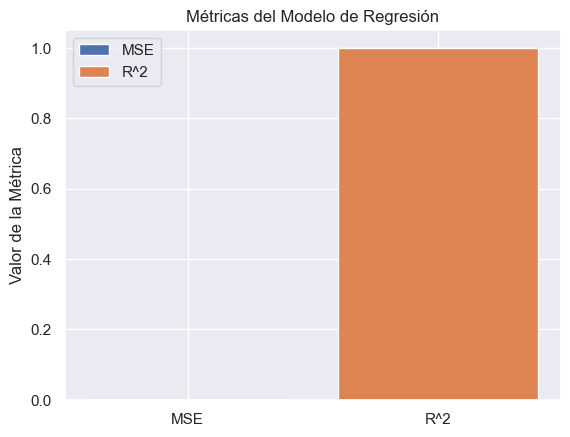

In [21]:
# Crear una lista de valores de métricas
metric_values = [mse, r2]
metric_names = ['MSE', 'R^2']
# Crear un gráfico de barras para visualizar las métricas
fig, ax = plt.subplots()
for i, metric_value in enumerate(metric_values):
    ax.bar(metric_names[i], metric_value, label=metric_names[i])

# Añadir etiquetas y leyenda
ax.set_ylabel('Valor de la Métrica')
ax.set_title('Métricas del Modelo de Regresión')
ax.legend()

# Mostrar el gráfico
plt.show()

El MSE es muy cercano a 0 lo que indica que  las predicciones del modelo están prácticamente en el punto exacto.

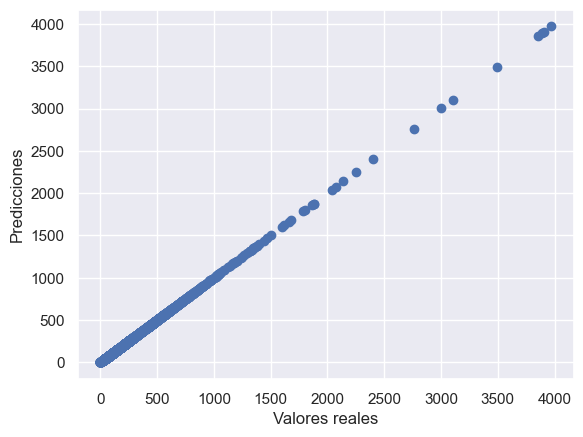

In [18]:
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

Obervamos que el plot muestra que que los datos fueron predichos de una maner amuy exacta.

In [14]:
print(f'Coeficientes: {coeficientes}')
print(f'Intercepto: {intercepto}')

Coeficientes: [ 3.74368453e-17 -1.99840144e-14 -4.76745379e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
Intercepto: -1.1937117960769683e-12


In [15]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores negativos a positivos
cv_scores = -cv_scores

# Imprimir los scores de validación cruzada
print(f'Scores de Validación Cruzada: {cv_scores}')
print(f'Promedio del Score: {cv_scores.mean()}')

Scores de Validación Cruzada: [2.23398722e-23 2.22384011e-23 2.22829600e-23 2.31552531e-23
 2.28038097e-23]
Promedio del Score: 2.2564059224860189e-23


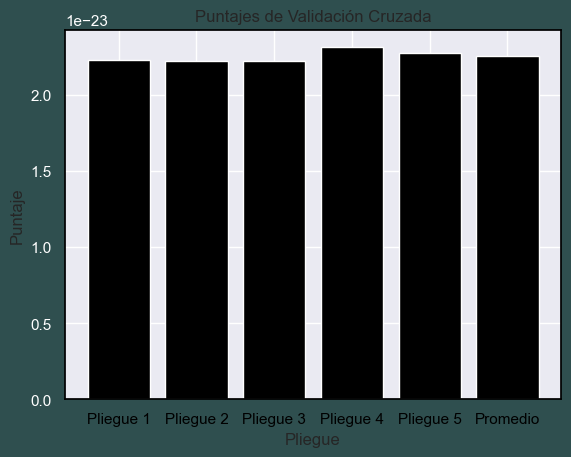

In [39]:

# Crear una lista de nombres para los pliegues
nombres_pliegues = [f'Pliegue {i+1}' for i in range(len(cv_scores))]

# Agregar el promedio a la lista de nombres
nombres_pliegues.append('Promedio')

# Crear una lista de valores para los puntajes
valores_puntajes = list(cv_scores) + [cv_scores.mean()]


# Crear un gráfico de barras para visualizar los puntajes
fig, ax = plt.subplots(facecolor='darkslategrey')  # Cambia el color de fondo aquí

# Agregar el gráfico de barras
ax.bar(nombres_pliegues, valores_puntajes, color='black')  # Cambia el color de las barras aquí

# Añadir etiquetas
plt.xlabel('Pliegue')
plt.ylabel('Puntaje')
plt.title('Puntajes de Validación Cruzada')


# Cambiar el color del texto y las líneas del gráfico
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='white')

# Mostrar el gráfico
plt.show()


# Conclusion
En conclusión las metricas indican que el modelo es eficiente en un 100%. Esto es irreal dado que en la practica ningun modelo deberia pdoer alcanzar este nivel de ajuste y esto mismo indica que el modelo podria estar sobreajustado. Por esto mismo se probo rehacerlo con un numero de variables de entrenamiento muy pqueño lo cual no cambio de manera significativa los resultados.
Es probable que los datos ya esten ajustados de cierta forma o que la variable retirada fuera un descriptor de importancia para otro tipo de modelos. Otra posible causa es la cantidad enorme de datos que se tienen a disposicion los cuales podrian estar cubriendo casi todos los puntos en donde el modelo podria tener que realizar una prediccion. 